In [1]:
#pip install -e .
#import FuzzySystem as fs

In [2]:
#!python 

In [3]:
import FuzzySystem as fs

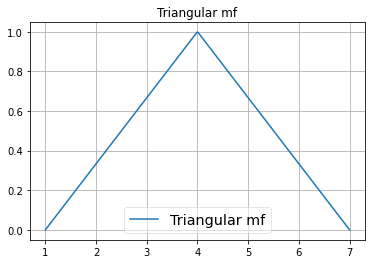

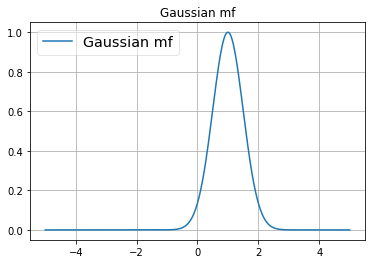

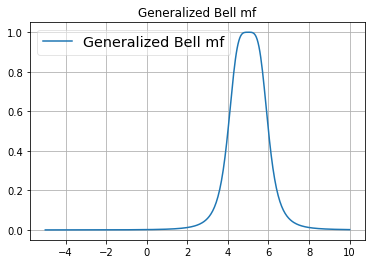

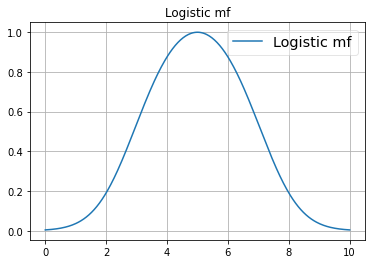

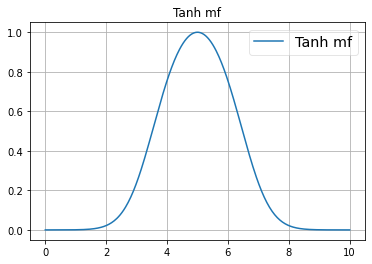

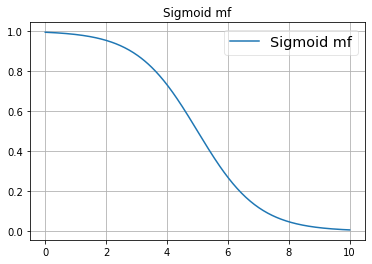

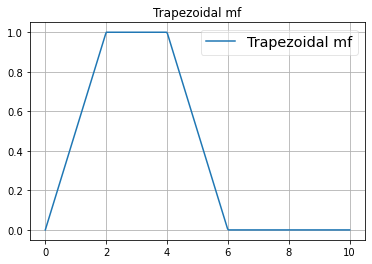

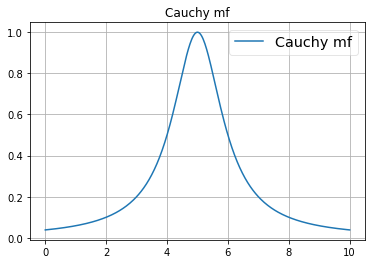

In [4]:
%matplotlib inline  

trimf = fs.Trimf([1,4,7])
trimf.show()
gaussmf = fs.Gaussmf([.5,1], universe=[-5,5])
gaussmf.show()
gbellmf = fs.GBellmf([1,2,5], universe=[-5,10])
gbellmf.show()
logmf = fs.Logmf([2,5], universe=[0,10])
logmf.show()
tanhmf = fs.Tanhmf([2,5], universe=[0,10])
tanhmf.show()
sigmf = fs.Sigmoidmf([-1,5], universe=[0,10])
sigmf.show()
trapmf = fs.Trapmf([0,2,4,6], universe=[0,10])
trapmf.show()
cauchymf = fs.Cauchymf([1,5], universe=[0,10])
cauchymf.show()

## Basic Tipping Problem

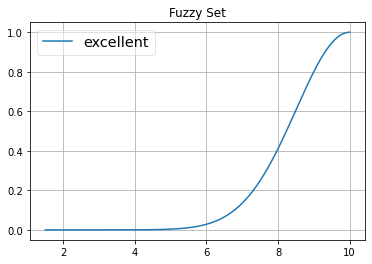

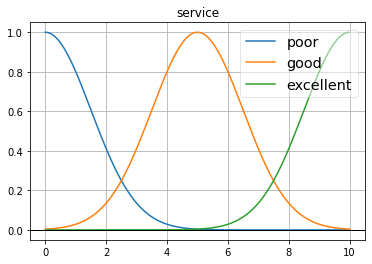

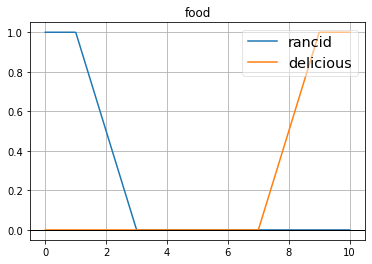

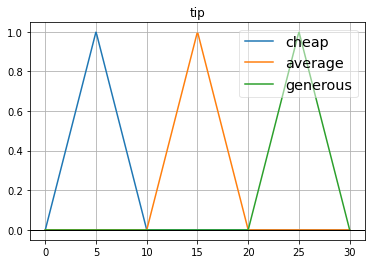

Inputs:
service: [8.183, 8.2]
food: [8.59, 4]
 IF service is poor and food is rancid THEN tip is cheap, fs = [0. 0.] with weight = 1.00
 IF service is good or food is delicious THEN tip is average, fs = [[0.82 0.1 ]] with weight = 1.00
 IF service is excellent or food is delicious THEN tip is generous, fs = [0.89 0.49] with weight = 1.00


In [5]:
#INPUTS

service_poor = fs.FuzzySet('poor', fs.Gaussmf([1.5, 0]))
service_good = fs.FuzzySet('good', fs.Gaussmf([1.5, 5]))
service_excellent = fs.FuzzySet('excellent', fs.Gaussmf([1.5, 10]))
service_excellent.show()
service = fs.FuzzyVariable('service',[service_poor, service_good, service_excellent], universe=[0, 10])
service.show()

food_rancid = fs.FuzzySet('rancid', fs.Trapmf([0,0,1,3]))
food_delicious = fs.FuzzySet('delicious', fs.Trapmf([7,9,10,10]))
food = fs.FuzzyVariable('food', [food_rancid, food_delicious], universe=[0, 10])
food.show()

#OUTPUT

tip_cheap = fs.FuzzySet('cheap', fs.Trimf([0,5,10]))
tip_avg = fs.FuzzySet('average', fs.Trimf([10,15,20]))
tip_generous = fs.FuzzySet('generous', fs.Trimf([20,25,30]))
tip = fs.FuzzyVariable('tip', [tip_cheap, tip_avg, tip_generous], universe=[0, 30])
tip.show()

#RULES


ant1  = fs.Antecedent(service['poor'], conector=min)
ant1.add(food['rancid'])
#ant1  = Antecedent(service['poor'] | food['rancid'])
cont1 = fs.Consequent([tip['cheap']])
rule1 = fs.FuzzyRule(ant1, cont1)

ant2  = fs.Antecedent(service['good'] | food['delicious'])
cont2 = fs.Consequent([tip['average']])
rule2 = fs.FuzzyRule(ant2, cont2)


ant3  = fs.Antecedent(service['excellent'], conector=max)
ant3.add(food['delicious'])

cont3 = fs.Consequent([tip['generous']])
rule3 = fs.FuzzyRule(ant3, cont3)

#Building the FIS

fis = fs.FuzzyInferenceSystem([rule1, rule2, rule3], 
                              and_op='prod', 
                              or_op='sum')
fis.verbose = True

#FIS Evaluation
inputs = {'service':[8.183, 8.2], 'food':[8.59,4]}
result = fis.eval(inputs)

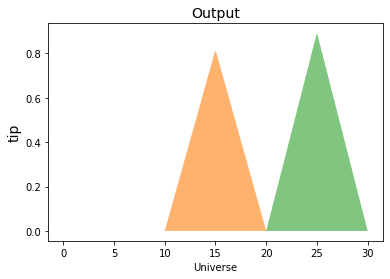

In [6]:
result.show()

Rule:  1
Output:  tip


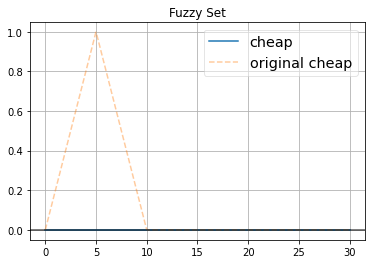

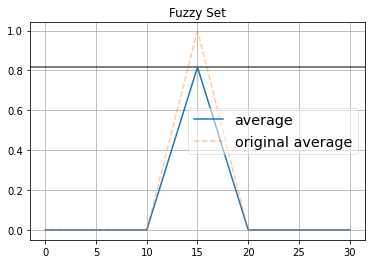

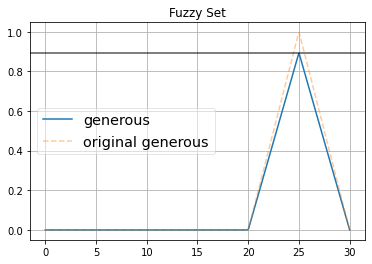

Rule:  2
Output:  tip


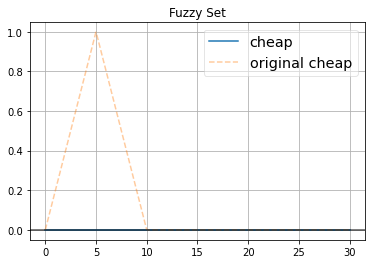

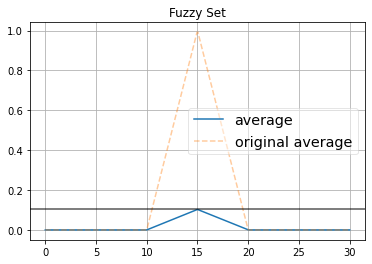

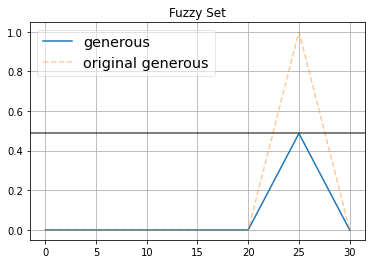

In [7]:
for i,rule in enumerate(result.fuzzysets):
    print('Rule: ', i+1)
    for y, fs_array in rule.items():
        print('Output: ', y)
        for fuzzyset in fs_array:
            fuzzyset.show()

In [8]:
fs.Centroid(result).eval()

<class 'FuzzySystem.output.Output'>


[{'tip': array(20.22)}, {'tip': array(23.26)}]

Instance: 0



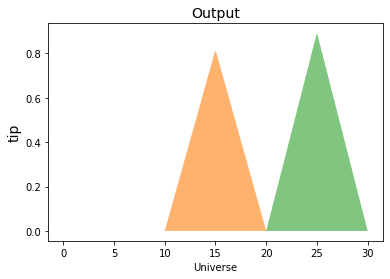

Instance: 1



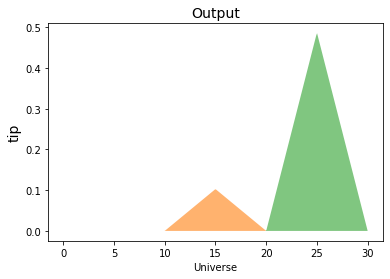

In [9]:
#instances
for i in range(2):
    print("Instance: {}\n".format(i))
    result.show(nout=i)

Instance: 0

<class 'dict'>
Centroid=20.225
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
Center of Sets=20.225
<class 'dict'>
Heights=21.478
<class 'dict'>
Modified Heights=21.478
<class 'dict'>
Mean Of Maximum=25.014
<class 'dict'>
Least Of Maximum=25.014
<class 'dict'>
First Of Maximum=25.014


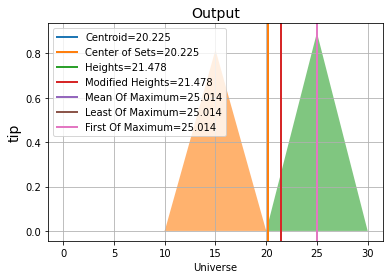

Instance: 1

<class 'dict'>
Centroid=23.257
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
Center of Sets=23.257
<class 'dict'>
Heights=23.891
<class 'dict'>
Modified Heights=23.891
<class 'dict'>
Mean Of Maximum=25.014
<class 'dict'>
Least Of Maximum=25.014
<class 'dict'>
First Of Maximum=25.014


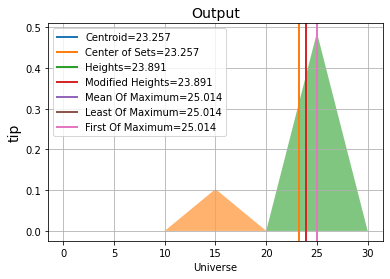

In [10]:

Defuzzification_methods = [fs.Centroid,
                           fs.CenterOfSets,  
                           fs.Heights, 
                           fs.ModifiedHeights, 
                           fs.MeanOfMaximum, 
                           fs.LastOfMaximum, 
                           fs.FirstOfMaximum]
#instances
for i in range(2):
    print("Instance: {}\n".format(i))
    result.show(Defuzzification_methods, nout=i)


# Non-singleton Input

In [11]:
import numpy as np


In [12]:
nsinp1_values = np.linspace(0,10,50)
nsinp1 = fs.NonSingleton(fs.Gaussmf([2,5]), nsinp1_values)

nsinp2_values = np.linspace(0,10,50)
nsinp2 = fs.NonSingleton(fs.Gaussmf([2,5]), nsinp2_values)

nsinputs = {'service':nsinp1, 'food':nsinp2}

resultns = fis.eval(nsinputs)

Inputs:
service: 
 Non-singleton class: Gaussmf params: [2, 5]  
  Range: [0.0 - 10.0]  
  Values: 50
food: 
 Non-singleton class: Gaussmf params: [2, 5]  
  Range: [0.0 - 10.0]  
  Values: 50
 IF service is poor and food is rancid THEN tip is cheap, fs = 0.15 with weight = 1.00
 IF service is good or food is delicious THEN tip is average, fs = [1.] with weight = 1.00
 IF service is excellent or food is delicious THEN tip is generous, fs = 0.62 with weight = 1.00


<class 'dict'>


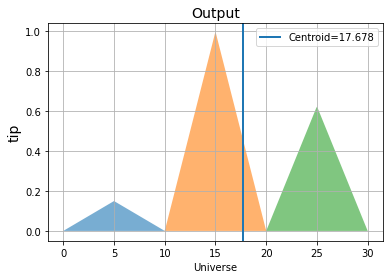

In [13]:
resultns.show(fs.Centroid)